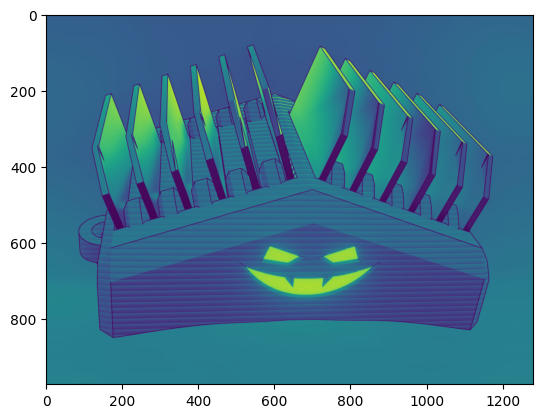

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html
#общее представление о распределении интенсивности изображения

# 1. Загружаем изображение в оттенках серого
img = cv.imread('../lab1/test.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден."

plt.imshow(img)

C:\Users\mrl1c\AppData\Local\Temp\ipykernel_55240\2445216271.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 256])


(0.0, 256.0)

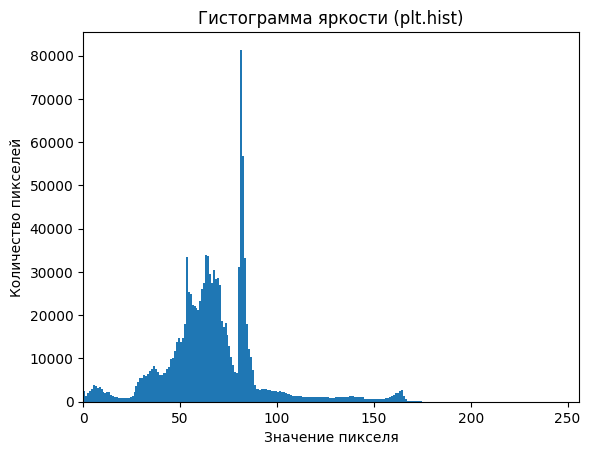

In [4]:
# 2. Построение простой гистограммы яркости с помощью matplotlib
plt.figure("Простая гистограмма (plt.hist)")
plt.title("Гистограмма яркости (plt.hist)")
plt.xlabel("Значение пикселя")
plt.ylabel("Количество пикселей")
plt.hist(img.ravel(), 256, [0, 256])
plt.xlim([0, 256])


(0.0, 256.0)

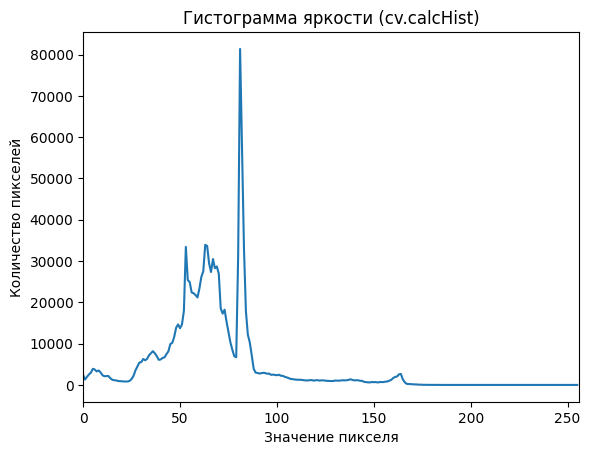

In [5]:
# 3. Построение гистограммы с помощью cv.calcHist
hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.figure("Гистограмма (cv.calcHist)")
plt.title("Гистограмма яркости (cv.calcHist)")
plt.xlabel("Значение пикселя")
plt.ylabel("Количество пикселей")
plt.plot(hist)
plt.xlim([0, 256])

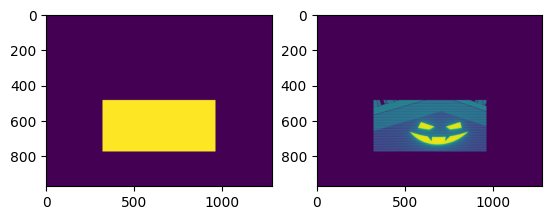

In [24]:
# 4. Построим маскb и гистограммы по области интереса
mask = np.zeros(img.shape[:2], np.uint8)
rows, cols = img.shape

# Выделим прямоугольную область в центре изображения
center_row_start = rows // 2
center_row_end = 4 * rows // 5
center_col_start = cols // 4
center_col_end = 3 * cols // 4
mask[center_row_start:center_row_end, center_col_start:center_col_end] = 255

masked_img = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt.imshow(mask)

plt.subplot(122), plt.imshow(masked_img)

plt.show()

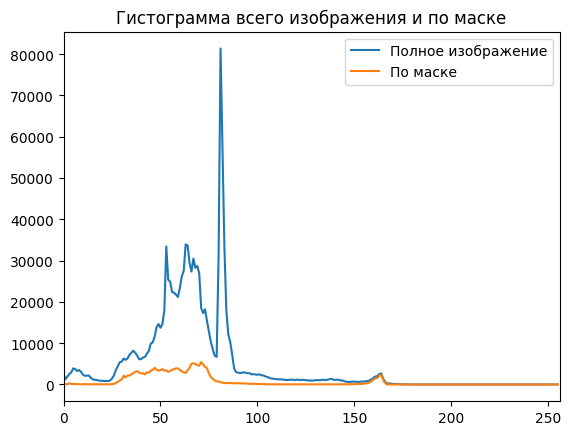

In [25]:
hist_mask = cv.calcHist([img], [0], mask, [256], [0, 256])

plt.figure("Сравнение гистограмм")
plt.title("Гистограмма всего изображения и по маске")
plt.plot(hist, label="Полное изображение")
plt.plot(hist_mask, label="По маске")
plt.xlim([0, 256])
plt.legend()
